In [40]:
%matplotlib inline

In [41]:
import numpy as np

In [42]:
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist


In [43]:
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

In [44]:
x_train.shape

(60000, 28, 28)

讓資料變成零到一之間


In [45]:
x_train=x_train.reshape(60000,28,28,1)/255

In [46]:
x_test=x_test.reshape(10000,28,28,1)/255

In [47]:
from tensorflow.keras.utils import to_categorical

one-hot 模式

In [48]:
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam

開一台訓練機器,然後做三層channel
,fliter分別改成16 64 128


In [50]:
model=Sequential()

In [51]:
model.add(Conv2D(16,(3,3),padding='same',
                input_shape=(28,28,1),
               activation='relu'))


In [52]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [53]:
model.add(Conv2D(64,(3,3),
                 padding="same",
                 input_shape=(28,28,1),
                 activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

In [54]:
model.add(Conv2D(128,(3,3),
                 padding="same",
                 input_shape=(28,28,1),
                 activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

將資料拉平

In [55]:
model.add(Flatten())

一開始的神經元設為60

In [56]:
model.add(Dense(60,activation="relu"))

輸出的神經元為10個

In [57]:
model.add(Dense(10,activation="softmax"))

In [58]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 14, 14, 64)        9280      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)             

loss function使用mae

In [62]:
model.compile(loss="mae", optimizer=SGD(lr=0.087),metrics=["accuracy"])

把batch size 改成200

In [63]:
model.fit(x_train, y_train, batch_size=200, epochs=12)

Train on 60000 samples
Epoch 1/12
60000/60000 [==============================] - 165s 3ms/sample - loss: 0.1796 - acc: 0.1539
Epoch 2/12
60000/60000 [==============================] - 143s 2ms/sample - loss: 0.1785 - acc: 0.3239
Epoch 3/12
60000/60000 [==============================] - 134s 2ms/sample - loss: 0.1730 - acc: 0.3348s - loss: 0.1731 - acc: 0.33
Epoch 4/12
60000/60000 [==============================] - 199s 3ms/sample - loss: 0.1260 - acc: 0.4153
Epoch 5/12
60000/60000 [==============================] - 132s 2ms/sample - loss: 0.1081 - acc: 0.4773
Epoch 6/12
60000/60000 [==============================] - 134s 2ms/sample - loss: 0.1011 - acc: 0.5128
Epoch 7/12
60000/60000 [==============================] - 145s 2ms/sample - loss: 0.0976 - acc: 0.5253
Epoch 8/12
60000/60000 [==============================] - 106s 2ms/sample - loss: 0.0954 - acc: 0.5347
Epoch 9/12
60000/60000 [==============================] - 128s 2ms/sample - loss: 0.0941 - acc: 0.5387s - loss: 0.0942 
Epoch

跑了快30分鐘.......


In [65]:
result = model.predict_classes(x_test)

In [68]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
def w(n):
    print("CNN預測是",class_names[result[n]])
    x=x_test[n].reshape(28,28)
    plt.imshow(x,cmap="PuBu")

CNN預測是 T-shirt/top


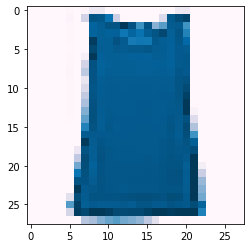

In [69]:
w(407)

In [71]:
from ipywidgets import interact_manual

In [73]:
interact_manual(w,n=(0,9999))

interactive(children=(IntSlider(value=4999, description='n', max=9999), Button(description='Run Interact', sty…

<function __main__.w(n)>

In [75]:
score=model.evaluate(x_test,y_test)

10000/10000 [==============================] - 16s 2ms/sample - loss: 0.0916 - acc: 0.54657s - loss: 0.0925 -  - ETA: 4s 


In [76]:
loss, acc =score


In [77]:
print("測試資料正確率為",acc)

測試資料正確率為 0.5465
